In [3]:
import pandas as pd
import seaborn as sns


In [7]:

label_f = '~/Ephys/Data/all_pats_bipole_soz_labels.csv'
label_df = pd.read_csv(label_f, header=None)
label_df.columns = ['subj','bipole','label']
label_df.head(4)


,subj,bipole,label
0,Epat31,AH3-AH4,1
1,Epat31,AH4-AH5,1
2,Epat31,AH5-AH6,1
3,Epat31,PH1-PH2,1
4,Epat31,PH2-PH3,1


In [45]:
def split_bipole(bip_df: pd.DataFrame):
    """splits the bipole column of a bipole df
    duplicates rows

    """
    assert 'bipole' in bip_df.columns, "Need bipole column!"

    contact1 = bip_df.bipole.apply(lambda x: x.split("-")[1])
    contact2 = bip_df.bipole.apply(lambda x: x.split("-")[1])

    df2 = bip_df.copy(deep=True)

    bip_df['contact'] = contact1
    df2['contact'] = contact2

    return pd.concat([bip_df,df2])

def map_label(label):
    label = int(label)
    match label:
        case 0:
            return "NIZ"
        case 1:
            return 'SOZ'
        case 2:
            return 'PZ'
        case 3:
            return 'IZ'
        
def merge_label(subj_df: pd.DataFrame, label_df: pd.DataFrame, leftcol: str, rightcol: str ) -> pd.DataFrame:
    """Merges contact label into the subj_df for both stim and response regions

    Args:
        subj_df (pd.DataFrame): dataframe with SPES data, could be CRP, raw SPES, etc
        as long as each row has an entry for a bipole (or monopolar) contact to merge on. 
        ASSUMES 'subj' is a column for sanity checks.
       
        label_df (pd.DataFrame): labels designating 'SOZ', 'NIZ', 'PZ', should be originating 
        from the 'all_pats_bipole.csv', may contain more than one subject, but ASSUMES 'subj' is a column.

        leftcol (str): column of subject bipoles, could be stim, or resp, will be renamed
        'leftcol_label'

       merge_labeleturns:
        pd.DataFrame: subj df with columns for labels
    """
    assert 'subj' in subj_df.columns, "Need a 'subj' column! in subj_df"
    assert 'subj' in label_df.columns, "Needa 'subj' column in label_df"
    assert 'label' in label_df.columns, "Need a label to merge into subj_df, check label_df!"
    assert subj_df.subj.values[0] in set(label_df.subj.values) ,"Subject missing from label df!"
    assert len(set(subj_df.subj)) == 1, 'Can only merge one subject at a time!'
    
    subj = subj_df.subj.values[0]
    label_df = label_df[label_df.subj == subj]
    subj_df = subj_df.merge(label_df[[rightcol, 'label']], left_on=leftcol, right_on=rightcol)
    subj_df.rename(columns={'label': f'{leftcol}_label'}, inplace=True)
    return subj_df



label_f = '~/Ephys/Data/all_pats_bipole_soz_labels.csv'
label_df = pd.read_csv(label_f, header=None)
label_df.columns = ['subj','bipole','label']
label_df.head(4)


label_df = split_bipole(label_df)

label_df.label = label_df.label.apply(map_label)
label_df


,subj,bipole,label,contact
0,Epat31,AH3-AH4,SOZ,AH4
1,Epat31,AH4-AH5,SOZ,AH5
2,Epat31,AH5-AH6,SOZ,AH6
3,Epat31,PH1-PH2,SOZ,PH2
4,Epat31,PH2-PH3,SOZ,PH3
...,...,...,...,...
7048,Spat55,LCM6 - LCM7,NIZ,LCM7
7049,Spat55,LCM8 - LCM9,NIZ,LCM9
7050,Spat55,LCM9 - LCM10,NIZ,LCM10
7051,Spat55,LCM10 - LCM11,NIZ,LCM11


In [38]:
res_df

,Unnamed: 0,alphas,TR,resp_reg,alpha_prime,stim_reg,ma,subj,contact,resp_reg_label,bipole,stim_reg_label
0,0,39.457219,10.000000,LA2,0.007706,LAC3-LAC4,5mA,Epat26,LA2,NIZ,LAC3-LAC4,NIZ
1,0,39.457219,10.000000,LA2,0.007706,LAC3-LAC4,5mA,Epat26,LA2,NIZ,LAC3-LAC4,NIZ
2,0,39.457219,10.000000,LA2,0.007706,LAC3-LAC4,5mA,Epat26,LA2,NIZ,LAC3-LAC4,NIZ
3,0,39.457219,10.000000,LA2,0.007706,LAC3-LAC4,5mA,Epat26,LA2,NIZ,LAC3-LAC4,NIZ
4,1,-2.700849,10.000000,LA2,-0.000528,LAC3-LAC4,5mA,Epat26,LA2,NIZ,LAC3-LAC4,NIZ
...,...,...,...,...,...,...,...,...,...,...,...,...
549095,8,61.905992,0.066406,RTP9,932.231414,LI3-LI4,1mA,Epat27,RTP9,IZ,LI3-LI4,IZ
549096,9,2374.014580,0.066406,RTP9,35749.866617,LI3-LI4,1mA,Epat27,RTP9,IZ,LI3-LI4,IZ
549097,9,2374.014580,0.066406,RTP9,35749.866617,LI3-LI4,1mA,Epat27,RTP9,IZ,LI3-LI4,IZ
549098,9,2374.014580,0.066406,RTP9,35749.866617,LI3-LI4,1mA,Epat27,RTP9,IZ,LI3-LI4,IZ


In [49]:
RES_FILES = ['/mnt/ernie_main/Ghassan/ephys/data/Epat26/Epat26_stim.csv','/mnt/ernie_main/Ghassan/ephys/data/Epat27/Epat27_stim.csv',\
             '/mnt/ernie_main/Ghassan/ephys/data/Epat30/Epat30_stim.csv', '/mnt/ernie_main/Ghassan/ephys/data/Epat31/Epat31_stim.csv',\
             '/mnt/ernie_main/Ghassan/ephys/data/Spat30/Spat30_stim.csv', '/mnt/ernie_main/Ghassan/ephys/data/Spat52/Spat52_stim.csv',\
             '/mnt/ernie_main/Ghassan/ephys/data/Spat34/Spat34_stim.csv'
             ]
import pdb
def agg_subject_results(result_files: list[str], label_df: pd.DataFrame) -> pd.DataFrame:
    dfs = []
    for i,f in enumerate(result_files):
        print(f)

        res_df = pd.read_csv(f)
        print(res_df.subj.values[0])
        
        tmp = merge_label(res_df,label_df, 'resp_reg', 'contact')
        if i ==1:
            pdb.set_trace()
         merge_df = merge_label(tmp, label_df, 'stim_reg', 'bipole')
        dfs.append(merge_df)
    return pd.concat(dfs)

res_df = agg_subject_results(RES_FILES[-3:], label_df)

/mnt/ernie_main/Ghassan/ephys/data/Spat30/Spat30_stim.csv
{'Spat30'}
/mnt/ernie_main/Ghassan/ephys/data/Spat52/Spat52_stim.csv
> /tmp/ipykernel_494468/254206991.py(16)agg_subject_results()
     14         if i ==1:
     15             pdb.set_trace()
---> 16         print(set(tmp.subj))
     17         merge_df = merge_label(tmp, label_df, 'stim_reg', 'bipole')
     18         dfs.append(merge_df)



In [42]:
df = pd.read_csv("/mnt/ernie_main/Ghassan/ephys/data/Spat52/Spat52_stim.csv")
df

,Unnamed: 0,alphas,TR,resp_reg,alpha_prime,stim_reg,ma,subj
0,0,2012.823013,0.105469,LA1,37.274500,LA9-LA10,3mA,Spat52
1,1,1724.634697,0.105469,LA1,31.937680,LA9-LA10,3mA,Spat52
2,2,1839.585218,0.105469,LA1,34.066393,LA9-LA10,3mA,Spat52
3,3,1371.812607,0.105469,LA1,25.403937,LA9-LA10,3mA,Spat52
4,4,1375.020656,0.105469,LA1,25.463345,LA9-LA10,3mA,Spat52
...,...,...,...,...,...,...,...,...
270835,5,-69.448227,0.804688,RTF9,-0.168564,LAH1-LAH2,1mA,Spat52
270836,6,-78.630713,0.804688,RTF9,-0.190851,LAH1-LAH2,1mA,Spat52
270837,7,-221.888420,0.804688,RTF9,-0.538564,LAH1-LAH2,1mA,Spat52
270838,8,94.349397,0.804688,RTF9,0.229003,LAH1-LAH2,1mA,Spat52


In [43]:
set(label_df.subj)

{'Epat02',
 'Epat03',
 'Epat04',
 'Epat05',
 'Epat06',
 'Epat08',
 'Epat09',
 'Epat10',
 'Epat11',
 'Epat13',
 'Epat14',
 'Epat15',
 'Epat17',
 'Epat18',
 'Epat19',
 'Epat20',
 'Epat21',
 'Epat22',
 'Epat23',
 'Epat24',
 'Epat25',
 'Epat26',
 'Epat27',
 'Epat28',
 'Epat30',
 'Epat31',
 'Epat33',
 'Epat34',
 'Epat35',
 'Epat37',
 'Epat38',
 'Epat39',
 'Epat41',
 'Epat43',
 'Spat02',
 'Spat03',
 'Spat05',
 'Spat06',
 'Spat07',
 'Spat08',
 'Spat09',
 'Spat10',
 'Spat11',
 'Spat12',
 'Spat13',
 'Spat14',
 'Spat17',
 'Spat18',
 'Spat19',
 'Spat20',
 'Spat22',
 'Spat23',
 'Spat24',
 'Spat25',
 'Spat26',
 'Spat27',
 'Spat28',
 'Spat29',
 'Spat30',
 'Spat31',
 'Spat32',
 'Spat33',
 'Spat34',
 'Spat36',
 'Spat37',
 'Spat39',
 'Spat40',
 'Spat41',
 'Spat42',
 'Spat44',
 'Spat45',
 'Spat46',
 'Spat47',
 'Spat48',
 'Spat49',
 'Spat50',
 'Spat51',
 'Spat52',
 'Spat53',
 'Spat55',
 'pat11',
 'pat33'}

In [27]:
res_df.rename({"ma": 'MA'})

,Unnamed: 0,alphas,TR,resp_reg,alpha_prime,stim_reg,ma,subj,contact,resp_reg_label,bipole,stim_reg_label
0,0,39.457219,10.000000,LA2,0.007706,LAC3-LAC4,5mA,Epat26,LA2,NIZ,LAC3-LAC4,NIZ
1,0,39.457219,10.000000,LA2,0.007706,LAC3-LAC4,5mA,Epat26,LA2,NIZ,LAC3-LAC4,NIZ
2,0,39.457219,10.000000,LA2,0.007706,LAC3-LAC4,5mA,Epat26,LA2,NIZ,LAC3-LAC4,NIZ
3,0,39.457219,10.000000,LA2,0.007706,LAC3-LAC4,5mA,Epat26,LA2,NIZ,LAC3-LAC4,NIZ
4,1,-2.700849,10.000000,LA2,-0.000528,LAC3-LAC4,5mA,Epat26,LA2,NIZ,LAC3-LAC4,NIZ
...,...,...,...,...,...,...,...,...,...,...,...,...
549095,8,61.905992,0.066406,RTP9,932.231414,LI3-LI4,1mA,Epat27,RTP9,IZ,LI3-LI4,IZ
549096,9,2374.014580,0.066406,RTP9,35749.866617,LI3-LI4,1mA,Epat27,RTP9,IZ,LI3-LI4,IZ
549097,9,2374.014580,0.066406,RTP9,35749.866617,LI3-LI4,1mA,Epat27,RTP9,IZ,LI3-LI4,IZ
549098,9,2374.014580,0.066406,RTP9,35749.866617,LI3-LI4,1mA,Epat27,RTP9,IZ,LI3-LI4,IZ


/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

<Axes: xlabel='resp_reg_label', ylabel='TR'>

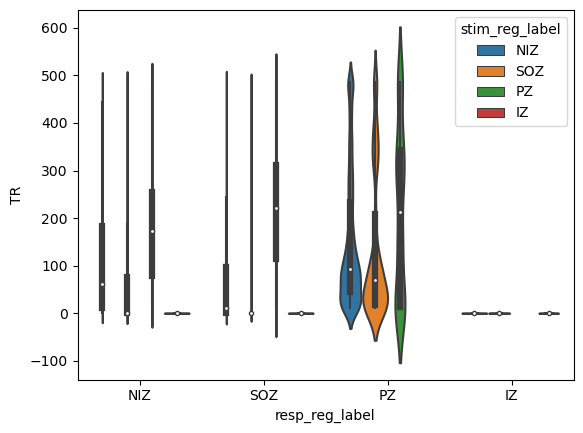

In [28]:

plot_df = res_df
sns.violinplot(plot_df,x='resp_reg_label', y='TR', hue='stim_reg_label')


In [32]:
plot_df.alpha_prime.mean()
plot_df.alpha_prime.var()

89125709.56604488

/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

<Axes: xlabel='resp_reg_label', ylabel='alpha_prime'>

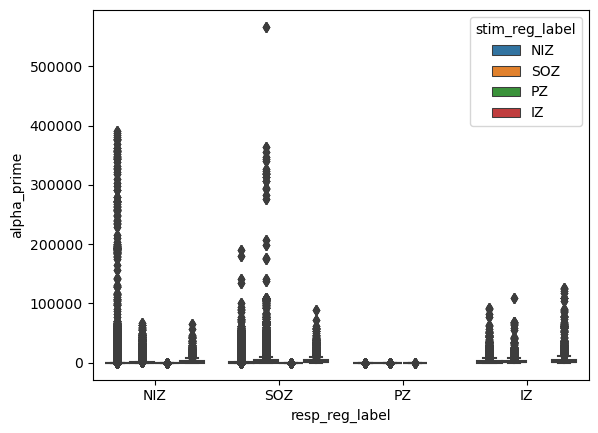

In [35]:
plot_df = plot_df[plot_df.alpha_prime >-350]
sns.boxplot(plot_df,x='resp_reg_label', y='alpha_prime', hue='stim_reg_label')

In [19]:
plot_df[['label','alpha_prime']].groupby("label").mean()

,alpha_prime
label,
NIZ,0.224055
PZ,-0.891111
SOZ,0.113712


In [22]:
plot_df[['label','alpha_prime']].groupby("label").var()

,alpha_prime
label,
NIZ,22.892964
PZ,3.409692
SOZ,4.625036


/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

<Axes: xlabel='TR', ylabel='alpha_prime'>

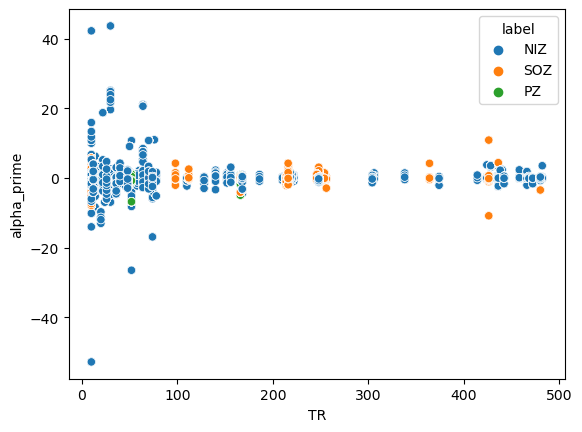

In [23]:
sns.scatterplot(data=plot_df[plot_df.stim_label =='SOZ'], x='TR',y='alpha_prime',hue='label')

/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

<Axes: xlabel='TR', ylabel='alpha_prime'>

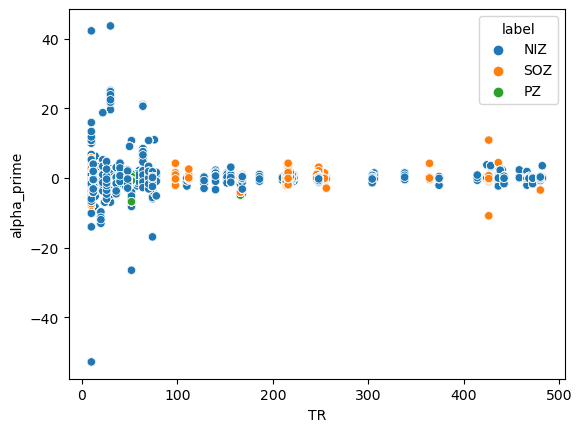

In [24]:
sns.scatterplot(data=plot_df[plot_df.stim_label =='NIZ'], x='TR',y='alpha_prime',hue='label')